In [1]:
import numpy as np
import scipy.integrate as si
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
N = 1001
l = 10
xvec, dx = np.linspace(-l, l, N, retstep=True)
print(dx)
print(dx - (xvec[1] - xvec[0]))

0.02
4.2674197509029455e-16


(40,)
0.38382055126425824


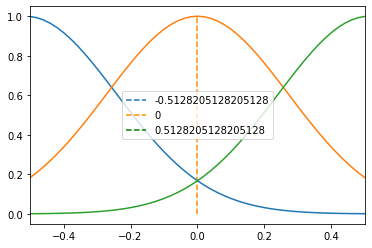

In [3]:
# test of overlap


# set the number of Gaussians we use as bases
Ng = 40 # 101

# make real space grid where each point
# is the location one of the Gaussian basis
# is centered around
xx, gx = np.linspace(-l, l, Ng, retstep=True)
print(xx.shape)

# set overlap
# this should insure that regardless of how many bases
# we use the overlate will be about the same
# fracmax sets at what fraction of the maximum hight
# we want our basis Gaussians to overlap
fracmax = 0.80
sigma = gx / (2 * np.sqrt(2 * np.log(1/fracmax) ) ) 
print(sigma)

# define Gaussian basis functions
def gauss(x, j):
    return np.exp(-((x - j*gx)/sigma)**2)

# plot the result
plt.plot(xvec, gauss(xvec,-1))
plt.vlines(-1*gx, ymin=0, ymax=1, label=-1*gx, linestyles='dashed')
plt.plot(xvec, gauss(xvec,0))
plt.vlines(0, ymin=0, ymax=1, label=0, color='darkorange', linestyles='dashed')
plt.plot(xvec, gauss(xvec,1))
plt.vlines(gx, ymin=0, ymax=1, label=gx, color='green', linestyles='dashed')
plt.xlim([-0.5,0.5])
plt.legend()
plt.show()

In [4]:
# - we want a SQUARE matrix where each row is one of the
# Gaussian basis functions sampled at the space points
# where the Gaussians basis functions are centered
# - the matrix must be square so we can use numpy.linalg.inv()
# or numpy.linalg.solv()
# - using broadcasting, we only need to expand one of the arrays
# so that np.exp(-(xx - np.expand_dims(xx,1))**2 / sigma)
# ends up with dimensions (Ng, Ng)
gmat = np.exp(-0.5*((xx - np.expand_dims(xx,1))/sigma)**2)
print(gmat.shape)

# this relates to how difficult it will be to invert
# gmat, a bigger number = harder to invert
np.linalg.cond(gmat)

(40, 40)


7.862746607381237

In [5]:
Nfine = N*2
xvecfine, dxfine = np.linspace(-l, l, Nfine, retstep=True)
# gmatplot = np.exp(-(np.expand_dims(xx,0) - np.expand_dims(xvec,1))**2 / sigma)
gmatplot = np.exp(-0.5*((xx - np.expand_dims(xvecfine, 1))/sigma)**2)
print(gmatplot.shape)

(2002, 40)


In [6]:
def myfunc(x):
    # out = (x < -3)*(x+3)**3/350 + ((x >= -3) & (x < 6))*(np.exp(-x - 3) - 1) + (x >= 6)*(np.exp(-9) - 1 + (x-6)**2/14)
    out = 2*np.cos(x) + np.sin(5*x)
    # harmonic potential
    # out = 0.5 * x**2
    # double well potential
    # out = 0.5 * (x**2 - 4)**2
    # soft Coulomb
    # out = 1 / np.sqrt(1 + (x - 10)**2)
    return out

In [7]:
# this gives us the coefficents which solve
# gmat @ coefs = myfunc(xx)
coefs = np.linalg.inv(gmat) @ myfunc(xx)
print(coefs.shape)

(40,)


In [171]:
#coefs

0.060550267314970305


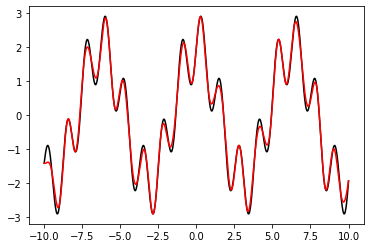

In [8]:
myfuncapprox = gmatplot @ coefs

print(dxfine*np.linalg.norm(myfunc(xvecfine) - myfuncapprox))

plt.plot(xvecfine, myfunc(xvecfine), '-', color='black')

plt.plot(xvecfine, myfuncapprox, '-', color='red')
plt.show()

<h3>Potential Operator for Gaussian Basis Model</h3>

In [73]:
def vhfn(h):
    k = np.pi * h / l
    return np.sqrt(np.pi) * sigma * np.exp(-(k**2) * sigma**2) * (coefs * np.exp(-1j* np.expand_dims( k, axis=1) * xx)).sum(axis=1) / (2 * l)

vhprct = vhfn(np.arange(2*Ng))

In [74]:
print(vhprct.shape)
print(vhprct)

(80,)
[-1.26182326e-01+0.00000000e+00j  1.33315480e-01-6.22385532e-05j
 -1.70085568e-01+1.42463279e-04j  6.88410550e-01-2.55506617e-04j
  7.86999932e-02+4.10583378e-04j -8.74193846e-03-6.10038792e-04j
 -6.91174862e-03+8.49547887e-04j  1.11949214e-02-1.11969703e-03j
 -1.15283283e-02+1.40864600e-03j  1.03095025e-02-1.70551168e-03j
 -8.55468751e-03+2.00435212e-03j  6.74687869e-03-2.30944947e-03j
 -5.11456399e-03+2.64510955e-03j  3.74954321e-03-3.08292366e-03j
 -2.66771709e-03+3.85387935e-03j  1.84495916e-03-6.20050926e-03j
 -1.23960365e-03-4.73713394e-02j  8.06462158e-04+2.29138793e-03j
 -5.04822359e-04-5.91226093e-04j  3.01667188e-04+1.04316965e-04j
 -1.71104607e-04+5.91682291e-05j  9.21169317e-05-1.07883363e-04j
 -4.73426028e-05+1.34513774e-04j  2.34109069e-05-8.94645654e-04j
 -1.12095816e-05-3.76729828e-05j  5.21446399e-06+7.53300084e-06j
 -2.35784645e-06-1.93865231e-06j  1.03469661e-06+5.35116171e-07j
 -4.39111254e-07-1.50307319e-07j  1.79119584e-07+4.19674846e-08j
 -6.94454640e-08-1.

In [76]:
vhcalc = np.zeros(2*Ng, dtype=np.complex128)

for h in range(2*Ng):
    
    total = 0
    
    for j in range(Ng):
        def thisgauss(x):
            return np.exp(-((x - xx[j])/sigma)**2)
        
        def ahfn(x):
            theta = np.pi * h * x / l
            return np.cos(theta) * thisgauss(x)

        def bhfn(x):
            theta = np.pi * h * x / l
            return np.sin(theta) * thisgauss(x)

        ah = (1 / l) * si.quad(ahfn, a=-l, b=l)[0]

        if h >= 1:
            bh = (1 / l) * si.quad(bhfn, a=-l, b=l)[0]
        else:
            bh = 0
    
        total += coefs[j] * l * (ah - 1j*bh)
    
    vhcalc[h] = total / (2 * l)

In [77]:
print(vhcalc.shape)
print(vhcalc)

(80,)
[-8.24875979e-02+0.00000000e+00j  9.12355224e-02-4.63471842e-04j
 -1.34582867e-01+9.43291589e-04j  7.17062859e-01-1.45720518e-03j
  1.35013144e-01+2.02598363e-03j -5.15112029e-02-2.67557304e-03j
  2.82837409e-02+3.44022147e-03j -1.77063299e-02-4.36737378e-03j
  1.17653968e-02+5.52584275e-03j -7.98749880e-03-7.02038474e-03j
  5.36532987e-03+9.01981924e-03j -3.41510996e-03-1.18170435e-02j
  1.87828870e-03+1.59760510e-02j -6.08470064e-04-2.27712006e-02j
 -4.74964729e-04+3.59812223e-02j  1.40405699e-03-7.54010156e-02j
 -2.16517098e-03-7.69271604e-01j  2.69936432e-03+5.03903456e-02j
 -2.91861820e-03-1.71761995e-02j  2.75717308e-03+2.39970541e-03j
 -2.24243257e-03+7.45486430e-03j  1.51497857e-03-1.59024215e-02j
 -7.57323012e-04+2.88864122e-02j  1.01909558e-04-2.88751703e-01j
  3.99673442e-04-1.79110362e-02j -7.52975694e-04+4.79943781e-03j
  9.87418439e-04-1.16222140e-03j -1.13568656e-03-2.59710897e-04j
  1.22562696e-03+8.62105221e-04j -1.27890959e-03-1.10343685e-03j
  1.31243679e-03+1.

In [78]:
print(np.linalg.norm(vhprct - vhcalc))
print(vhprct - vhcalc)

0.793000647237383
[-4.36947285e-02+0.00000000e+00j  4.20799580e-02+4.01233289e-04j
 -3.55027003e-02-8.00828310e-04j -2.86523091e-02+1.20169856e-03j
 -5.63131505e-02-1.61540025e-03j  4.27692645e-02+2.06553425e-03j
 -3.51954895e-02-2.59067358e-03j  2.89012512e-02+3.24767674e-03j
 -2.32937250e-02-4.11719675e-03j  1.82970013e-02+5.31487305e-03j
 -1.39200174e-02-7.01546712e-03j  1.01619886e-02+9.50759402e-03j
 -6.99285269e-03-1.33309415e-02j  4.35801327e-03+1.96882770e-02j
 -2.19275236e-03-3.21273430e-02j  4.40902168e-04+6.92005063e-02j
  9.25567335e-04+7.21900264e-01j -1.89290216e-03-4.80989576e-02j
  2.41379584e-03+1.65849734e-02j -2.45550590e-03-2.29538844e-03j
  2.07132796e-03-7.39569608e-03j -1.42286164e-03+1.57945381e-02j
  7.09980409e-04-2.87518984e-02j -7.84986507e-05+2.87857057e-01j
 -4.10883024e-04+1.78733633e-02j  7.58190158e-04-4.79190481e-03j
 -9.89776285e-04+1.16028274e-03j  1.13672125e-03+2.60246014e-04j
 -1.22606607e-03-8.62255528e-04j  1.27908871e-03+1.10347882e-03j
 -1.312